In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

import seaborn as sns
import re

from bs4 import BeautifulSoup
import unidecode
from word2number import w2n
import emoji
import contractions
import string

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS

import os
import json

from nltk import chunk

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lirriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [406]:
stop=stopwords.words('english')
stopWords = list(['everywhere', 'although', 'given', 'mainly', 'again', 'make', 'we', 'tends', 'showns', \
                  'sup', 'undoing', 'oh', 'something', 'kg', 'to', 'unto', 'forth', 'had', 'page', 'otherwise', \
                  'can', "one's", 'evermore', 'minus', 'both', 'apart', 'hardly', 'whom', 'put', 'am', 'everything',\
                  'seven', 'somebody', "that's", 'inc', 'specifically', "can't", 'recently', 'even', 'announce', \
                  'caption', 'abroad', 'almost', 'go', "i'd", 'hither', 'probably', 'twice', 'there', 'whither', \
                  'yes', 'affected', 'definitely', 'hes', 'seen', 'maybe', 'provides', "t's", "a's", 'looking', \
                  'forever', 'ff', 'hereafter', 'under', 'actually', 'sec', 'seems', 'second', 'shows', 'beforehand',\
                  'respectively', 'somethan', 'ours', 'g', 'wonder', 'first', 'overall', 'without', 'having', "he's",\
                  "don't", "who's", 'half', 'million', 'directly', 'x', 'immediately', 'shes', 'abst', 'soon', 'arise',\
                  'thereby', 'certain', 'd', 'secondly', 'id', 'ref', "he'd", 'namely', 'thanx', 'theres', 'might', \
                  "there've", "wasn't", 'happens', 'why', 'as', 'whilst', 'came', 'backward', 'while', 'ie', 'said',\
                  'aside', 'wherein', 'act', 'owing', 'near', 'amidst', 'also', 'hers', 'comes', 'either', 'date', \
                  'added', 'latterly', 'hi', 'say', 'besides', 'different', 'give', 'immediate', 'right', 'somewhere',\
                  'ml', 'neverf', 'ever', 'e', 'exactly', 'gotten', 'ahead', 'w', 'take', 'hundred', 'self', 'nd', \
                  'predominantly', 'someone', 'whereafter', "mustn't", "daren't", 'itself', 'being', "c's", 'needs',\
                  "they've", "you've", 'z', 'please', 'serious', 'whoever', 'ask', 'some', 'found', 'allow', 'made', \
                  'value', 'forward', 'unlike', 'due', 'suggest', 'howbeit', 'useful', 'him', 'notwithstanding', \
                  'never', 'often', 'that', 'gave', 'mug', 'refs', 'done', "where's", 'via', 're', 'than', "you'll", \
                  'presumably', 'eight', 'largely', 'anyone', 'once', 'anyway', 'others', 'wherever', 'whereby', \
                  'somehow', 'ending', 'the', 'were', 'for', 'beside', "they'll", 'your', "couldn't", 'begins', 'need',\
                  'seeing', 'invention', 'associated', "hasn't", 'became', 'alongside', 'usually', 'want', 'similarly',\
                  'within', 'sure', "it'd", 'poorly', 'here', 'think', 'containing', 'im', 'available', 'insofar', 'ca',\
                  'themselves', 'little', 'anywhere', 'someday', 'after', 'try', 'kept', "mayn't", 'other', 'tries', \
                  'perhaps', 'several', 'till', 'moreover', 'zero', 'best', 'only', "weren't", 'line', 'did',\
                  'getting', 'uses', 'upwards', "they're", 'an', "i'll", 'q', 'particular', 'formerly',\
                  'ord', "shouldn't", 'k', 'above', 'nearly', 'six', 'wish', 'he', 'knows', 'far', 'sufficiently', \
                  'looks', 'rd', 'farther', 'consider', 'anyways', 'thereupon', 'fix', "haven't", 'goes', 'non',\
                  'same', 'already', 'greetings', "he'll", 'km', 'lower', 'me', "she'd", 'significant', "they'd", \
                  'que', 'thereafter', 'mrs', 'shall', 'quickly', 'resulted', 'anymore', 'whichever', "ain't", 'get',\
                  'however', 'edu', 'round', 'likewise', 'back', 'of', 'okay', 'hello', 'its', 'a', 'various', \
                  'normally', 'behind', 'importance', 'h', 'if', 'mg', 'few', 'despite', 'ago', "there'll", \
                  'corresponding', 'hid', 'pages', 'mostly', 't', 'theirs', 'sub', 'between', "isn't", 'accordance',\
                  'becomes', 'nos', 'own', 'all', "mightn't", 'much', 'keeps', 'they', "what's", 'th', 'are', 'end', \
                  'such', 'toward', 'whose', 'is', 'come', 'believe', 'rather', 'look', 'past', 'then', 'thanks', \
                  'clearly', 'across', 'com', 'none', 'u', 'one', "wouldn't", 'briefly', 'each', 'concerning', 'do', \
                  'f', 'know', 'allows', 'important', 'run', 'plus', 'really', 'was', 'un', 'better', 'but', "it's", 'old', 'viz', 'heres', "you're", 'below', 'gives', 'et-al', 'ourselves', 'successfully', 'name', 'seemed', 'sometime', 'hopefully', 'example', 'among', 'their', 'used',
                  'may', "didn't", 'thus', 'ignored', 'meanwhile', 'these', 'still', 'affecting', 'how', 'potentially', "that've", 'whether', 'contain', 'her', 'substantially', 'course', 'liked', 'whence', 'nay', 'everyone', 'l', 'whereupon', 'thru', 'means', 'she', 'by', 'inside', 'selves', 'gone', 'apparently', 'whole', 'become', 'c', 'cant', 'related', 'nobody', 'results', 'latter', 'et', 'nevertheless', 'primarily', "what've", 'home', "what'll", 'on', 'himself', 'like', 'hed', 'thirty', 'effect', 'seeming', 'would', 'follows', 'just', "we're", 'known', 'vs', 'described', 'everybody', 'inc.', 'yet', 'what', 'nor', 'pp', 'since', 'every', "there're", 'things', 'his', 'shown', 'p', 'ninety', 'index', 'keep', 'willing', 'help', 'whereas', 'else', 'considering', 'four', 'lets', 'brief', 'any', "c'mon", 'hereby', 'it', 'asking', 'gets', 'no-one', 'merely', 'affects', 'does', 'herein', 'not', "you'd", 'specifying', 'trying', 'meantime', 'regardless', 'anyhow', "we'll", 'recent', 'noone', 'therefore', 'going', 'yourself', 'has', 'another', 'wants', 'necessarily', 'research', 'obviously', 'amongst', 'up', 'though', 'too', 'm', 'auth', 'aren', 'na', 'sensible', 'over', 'ex', 'them', 'stop', 'hence', 'says', 'reasonably', 'many', 'according', 'beginning', 'throughout', 'towards', 'afterwards', 's', 'always', 'i', 'ed', 'eg', 'using', 'especially', 'novel', "there's", "aren't", 'two', 'mine', 'lest', 'co', 'later', 'begin', 'entirely', 'taking', 'saying', 'eighty', 'slightly', 'able', "we'd", 'beyond', 'until', "that'll", 'j', 'placed', 'with', "she'll", 'mean', 'regarding', 'sometimes', 'welcome', 'promptly', 'doing', "let's", 'backwards', 'regards', 'strongly', 'adj', 'those', 'whatever', 'possibly', 'consequently', 'use', 'n', 'very', 'whenever', 'ran', 'before', "i've", 'awfully', 'tell', 'be', 'last', 'outside', "who'd", 'now', 'ltd', 'certainly', 'from', 'anything', 'sorry', 'unlikely', 'us', 'specified', 'sent', 'you', 'specify', 'about', 'myself', 'see', 'ought', 'fairly', 'been', 'thence', 'thats', 'where', 'currently', 'saw', 'most', "i'm", 'well', 'least', 'will', 'opposite', 'our', 'giving', 'hereupon', 'amid', 'at', 'shed', 'seriously', 'per', 'quite', 'noted', 'upon', "oughtn't", 'showed', 'furthermore', 'off', 'neither', 'indicated', 'so', 'particularly', 'section', 'inner', 'inasmuch', 'into', 'causes', 'accordingly', 'herself', 'resulting', 'took', 'my', 'down', 'v', 'obtained', 'except', 'through', 'possible', 'got', 'former', 'relatively', 'part', 'show', 'yours', 'arent', 'nothing', 'thoroughly', 'couldnt', 'followed', 'or', 'beginnings', "who'll", 'contains', 'mr', 'miss', 'following', 'let', 'previously', 'provided', 'should', 'in', 'and', 'readily', 'cause', 'anybody', 'truly', 'whomever', 'nowhere', 'no', 'cannot', 'have', 'could', 'lately', "'ll", 'ok', 'onto', 'omitted', 'present', 'went', 'underneath', 'this', 'neverless', 'during', 'indicates', 'etc', 'downwards', 'somewhat', 'indicate', 'unfortunately', 'seem', 'three', "we've", 'proud', "needn't", 'co.', 'taken', "there'd", 'next', 'less', 'y', 'becoming', 'more', 'nonetheless', 'against', 'biol', "it'll", 'versus', 'thorough', "won't", 'ah', 'r', 'inward', 'low', 'unless', 'significantly', 'indeed', 'uucp', 'together', "she's", 'qv', 'tried', 'along', 'alone', 'thank', 'thing', 'similar', 'who', 'instead', 'new', 'dare', 'around', 'information', "hadn't", 'which', "shan't", 'approximately', 'appear', 'way', 'enough', 'changes', 'o', 'obtain', 'when', 'likely', 'b', 'ones', "doesn't", 'out', 'five', 'necessary', 'must', 'makes', 'fifth', 'away', 'third', 'appropriate', 'elsewhere', 'further', 'therein', "here's", 'itd', 'yourselves', 'nine', 'fewer', 'because',\
                  'dm', 'rt', 'will', 'really', 'link', 'go', 'get', 'got'])
stopWords.extend(['rt', 'us', 'like', 'one', 'via', 'ur', 'lo', 'en', 'sometimes', 'eventually', 'somewhere', 
                       'other', 'yes', 'no', 'me', 'de', 'fyp', 'foryou', 'foryoupage', 'viral', 'duet', 'stitch',\
                 'greenscreen', 'fy', 'tiktok', 'trending', 'cc', 'la', 'something'])
symbols_to_isolate = '.,?!-;*"…:—()%#$&_/@＼・ω+=”“[]^–>\\°<~•≠™ˈʊɒ∞§{}·τα❤☺ɡ|¢→̶`❥━┣┫┗Ｏ►★©―ɪ✔®\x96\x92●£♥➤´¹☕≈÷♡◐║▬′ɔː€۩۞†μ✒➥═☆ˌ◄½ʻπδηλσερνʃ✬ＳＵＰＥＲＩＴ☻±♍µº¾✓◾؟．⬅℅»Вав❣⋅¿¬♫ＣＭβ█▓▒░⇒⭐›¡₂₃❧▰▔◞▀▂▃▄▅▆▇↙γ̄″☹➡«φ⅓„✋：¥̲̅́∙‛◇✏▷❓❗¶˚˙）сиʿ✨。ɑ\x80◕！％¯−ﬂﬁ₁²ʌ¼⁴⁄₄⌠♭✘╪▶☭✭♪☔☠♂☃☎✈✌✰❆☙○‣⚓年∎ℒ▪▙☏⅛ｃａｓǀ℮¸ｗ‚∼‖ℳ❄←☼⋆ʒ⊂、⅔¨͡๏⚾⚽Φ×θ￦？（℃⏩☮⚠月▸■⇌☐☑⚡☄ǫ╭∩╮，例＞ʕɐ̣Δ₀✞┈╱╲▏▕┃╰▊▋╯┳┊≥☒↑☝ɹ☛♩☞ＡＪＢ◔◡↓♀⬆̱ℏ\x91⠀ˤ╚↺⇤∏✾◦♬³の｜／∵∴√Ω¤☜▲↳▫‿⬇✧ｏｖｍ－２０８＇‰≤∕ˆ⚜☁'
symbols_to_delete = '\n\r\xa0\ue014\t\uf818\uf04a\xad\uf0e0\u200b\u200eعدويهصقأناخلىبمغرЕ\u202a\u202cᴍʏʀᴇɴᴅᴏᴀᴋʜᴜʟᴛᴄᴘʙғᴊᴡɢשלוםבי‼\x81エンジ故障\u2009ᴵ͞\u200fאעכח💯⛽🚄🏼ஜᴠ🚲‐\x7fἐὶήιὲκἀίῃἴξＨ\ufeff\u2028\u3000تحكسةzفزط\u2008🏾🏽🎆\x08‑𝘊𝘦𝘳𝘢𝘵𝘰𝘤𝘺𝘴𝘪𝘧𝘮𝘣地獄谷улкнПоАНה🔗🚽歌舞伎🇸мυтѕ⤵🎃\u200a🐟эпрд\x95\u2002\u2004ˢᵒʳʸᴼᴷᴺʷᵗʰᵉᵘ\x13🚬\ue602άοόςέὸתמדףנרךצט🔄🔤🔛\uf0b7\uf04c\x9f\x10成都ехἸᾶὁ\u202d🍇\ue613小土豆❔⁉\u202f👠》कर्मा🇹🇼蔡英文🎲レクサス外国人关系Сб💋ьыгя不是\x9c\x9d🗑\u2005༼つ༽ḷЗз▱ц￼卖温哥华议会下降你失去所有的钱加拿大坏税骗子🐝ツ\x85🍺آإشءἔ油别克🤡\u2003ʲшчИОРФДЯМюж🖑ὐύύ特殊作戦群щ💨圆明园קℐ⏏ệ\u200d𝓒𝓲𝓿𝓵안영하세요ЖљКћῦ我出生在了可以说普通话汉语好极🖒🚪天一家⚲\u2006⚭⚆⬭⬯⏖新✀╌🇦ХШ\x1f杀鸡给猴看ʁ𝗪𝗵𝗲𝗻𝘆𝗼𝘂𝗿𝗮𝗹𝗶𝘇𝗯𝘁𝗰𝘀𝘅𝗽𝘄𝗱ϖ\u2000үսᴦᎥһͺ\u2007հ\u2001ɩｙｅ൦ｌƽｈ𝐓𝐡𝐞𝐫𝐮𝐝𝐚𝐃𝐜𝐩𝐭𝐢𝐨𝐧Ƅᴨןᑯ໐ΤᏧ௦Іᴑ܁𝐬𝐰𝐲𝐛𝐦𝐯𝐑𝐙𝐣𝐇𝐂𝐘𝟎ԜТᗞ౦〔Ꭻ𝐳𝐔𝐱𝟔𝟓𝐅🐋ﬃё𝘥𝘯𝘶💐🌋🌄🌅𝙬𝙖𝙨𝙤𝙣𝙡𝙮𝙘𝙠𝙚𝙙𝙜𝙧𝙥𝙩𝙪𝙗𝙞𝙝𝙛👺🐷ℋ𝐀𝐥𝐪🚶𝙢Ἱ💸ج패티Ｗ𝙇ᵻɜ🎫\uf0a7БУі🚢🚂ગુજરાતીῆ🏃𝓬𝓻𝓴𝓮𝓽𝓼☘﴾̯﴿₽\ue807𝑻𝒆𝒍𝒕𝒉𝒓𝒖𝒂𝒏𝒅𝒔𝒎𝒗𝒊\u200cЛ‒⎌公寓养宠物吗操美𝒑𝒚𝒐𝑴欢迎来到阿拉斯ספ𝙫𝒌𝙊𝙭𝙆𝙋𝙍𝘼𝙅ﷻ🦄巨收赢得白鬼愤怒要买额ẽ🚗🐳𝟏𝐟𝟖𝟑𝟕𝒄𝟗𝐠𝙄𝙃👇锟斤拷𝗢𝟳𝟱𝟬⦁マルハニチロ株式社⛷한국어ㄸㅓ니͜ʖ𝘿𝙔₵𝒩ℯ𝒾𝓁𝒶𝓉𝓇𝓊𝓃𝓈𝓅ℴ𝒻𝒽𝓀𝓌𝒸𝓎𝙏ζ𝙟𝘃𝗺𝟮𝟭𝟯𝟲👋🦊多伦🐽🎻🎹⛓🏹🍷🦆为和中友谊祝贺与其想象对法如直接问用自己猜本传教士没积唯认识基督徒曾经让相信耶稣复活死怪他但当们聊些政治题时候战胜因圣把全堂结婚孩恐惧且栗谓这样还♾🎸🤕🤒⛑🎁批判检讨🏝🦁🙋😶쥐스탱트뤼도석유가격인상이경제황을렵게만들지않록잘관리해야합다캐나에서대마초와화약금의품런성분갈때는반드시허된사용凸ὰ💲🗯𝙈Ἄ𝒇𝒈𝒘𝒃𝑬𝑶𝕾𝖙𝖗𝖆𝖎𝖌𝖍𝖕𝖊𝖔𝖑𝖉𝖓𝖐𝖜𝖞𝖚𝖇𝕿𝖘𝖄𝖛𝖒𝖋𝖂𝕴𝖟𝖈𝕸知彼百\uf005𝙀𝒛𝑲𝑳𝑾𝒋𝟒𝙒𝘾𝘽𝘩𝘨ὼṑ𝑱𝑹𝑫𝑵𝑪🇰ᓇᒧᔭᐃᐧᐦᑳᐨᓃᓂᑲᐸᑭᑎᓀᐣ点击查版𝑥𝑦𝑧ＮＧ👣\uf020っфΞ\x0b𝑯𝒒𝟐🐲چی𝑮𝗕𝗴ꜥⲣⲏ鉄リ事件ї「」\uf203\uf09a\uf222\ue608\uf202\uf099\uf469\ue607\uf410\ue600燻製シ虚偽屁理屈Г𝑩𝑰𝒀𝑺𝗳𝗜𝗙𝗦𝗧ὺἈἡχῖΛ⤏🇳𝒙ψՁմեռայինրւդձ冬至ὀ𝒁𝑷𝘬𝘱𝘸𝘷𝘐𝘭𝘓𝘖𝘹𝘲𝘫کΒώ💢ΜΟΝΑΕ🇱♲𝝈↴⊘Ȼ𝐎𝐍𝐊𝑭ｇｒｎｔｉｄｕｆｂｋ𝟰🇴🇭🇻🇲𝗞𝗭𝗘𝗤《\uf10aლڡ\U0001f92f\U0001f92aἱ𝗸𝗟𝗠𝗷さようなら🔼'
CONTRACTION_MAPPING = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
isolate_dict = {ord(c):f' {c} ' for c in symbols_to_isolate}
remove_dict = {ord(c):f'' for c in symbols_to_delete}


NON_STOP_WORDS = ['no', 'not']
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [239]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text


def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text


def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text, slang=True)
    return text

def remove_url(txt):
    return " ".join(re.sub("(\w+:\/\/\S+)", " ", txt).split())

def remove_mentions(txt):
    return re.sub('(@[A-Za-z0-9_]\S+\s+)', '', (str(txt) + " "))

def remove_digits(txt):
    return list(filter(lambda t: not t.isdigit(), txt))

def lemmatize_with_postag(sentence):
    sent = TextBlob(' '.join(sentence))
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return lemmatized_list

def poster_stemmer(txt):
    stemmer = PorterStemmer()
    return [stemmer.stem(plural) for plural in txt]

def correct_typo(tokens):
    spell = SpellChecker()
    return [spell.correction(t) if len(spell.unknown([t]))>0 else t for t in tokens]
    

def text_preprocessing(text, is_tm=True):
    """preprocess text with default option set to true for all steps"""
    #convert emojies to txt
    text = remove_url(text)
    text = remove_mentions(text)
    for k, v in CONTRACTION_MAPPING.items():
        text = text.replace(' %s ' % k, ' %s ' % v)
    text = text.translate(remove_dict)
    text = text.translate(isolate_dict)
    if is_tm:
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
    else:
        text = emoji.demojize(text)
    text = strip_html_tags(text)
    text = remove_whitespace(text)
    text = remove_accented_chars(text)
    text = expand_contractions(text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.split()
#     text = [word for word in text.split() if not word in stopWords]
    text = remove_digits(text)
    return text  

In [10]:
df_instagram = pd.read_csv('df_instagram.uu')
df_instagram.head()

,Unnamed: 0,id,parent_id,tag,text,ts,likes,is_comment,comments_count,location_name,location_city,location_country,tags,text_proc_tm,text_proc
0,0,2304727226113192671,NaN,feminismo,Quem mais???\n.\n.\n#ebook #amazon #brasil #li...,1588964916,3527,False,58,NaN,NaN,NaN,"['empodere', 'book', 'empoderamento', 'female'...",quem mais ebook amazon brasil livros leia leia...,quem mais ebook amazon brasil livros leia leia...
1,1,17862460147860155,2.304727e+18,feminismo,Todo santo dia,1588966189,0,True,0,NaN,NaN,NaN,NaN,todo santo dia,todo santo dia
2,2,17846904701092750,2.304727e+18,feminismo,@amandaintensifies,1588966476,0,True,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,18140722744061035,2.304727e+18,feminismo,Every day!!,1588966736,0,True,0,NaN,NaN,NaN,NaN,day,day
4,4,18089176312198189,2.304727e+18,feminismo,🙌,1588966796,0,True,0,NaN,NaN,NaN,NaN,NaN,raise hand


In [11]:
df_instagram.to_json('instagram_dataframe.json')

In [244]:
df_instagram['text_proc_v2'] = df_instagram['text'].astype(str).apply(text_preprocessing)

In [253]:
def plot_top_stopwords_barchart(dic):
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    plt.xlabel('Most common stop words')
    plt.show()

In [154]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [252]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=123)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.xlabel('Most common words')
    plt.imshow(wordcloud)
    plt.show()

In [422]:
def explore_data(df, text_field, proc_text_field, tag_field):
    df[text_field] = df[text_field].fillna('')
    df[proc_text_field] = df[proc_text_field].fillna('')
    
    mean_txt_length = df[text_field].astype(str).apply(lambda x: len(x)).mean()
    words = []
    for w in df[text_field].astype(str).apply(lambda x: x.split()):
        words.extend(w)
    mean_word_lenth = sum(len(word) for word in words) / len(words)
    print(f'average text length = {mean_txt_length}')
    print(f'average word length = {mean_word_lenth}')
    df[text_field].str.len().hist(bins=20)
    plt.xlabel('Text length')
    plt.show()
    
    df[text_field].str.split().map(lambda x: len(str(x))).hist(bins=20)
    plt.xlabel('Number of words in text')
    plt.show()
    
    df[text_field].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(bins=20)
    plt.xlabel('Words length')
    plt.show()
    
    corpus=[]
    new = df[proc_text_field]
    corpus = [word for i in new for word in i]
    dic = defaultdict(int)
    for word in corpus:
        if (word in stopWords or word in stop) and len(word) > 1:
            dic[word] += 1
    plot_top_stopwords_barchart(dic)
    
    counter=Counter(corpus)
    most=counter.most_common()
    x, y= [], []
    for word, count in most[:170]: 
        if (word not in stopWords and word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)
    plt.xlabel('Most common words')
    plt.show()
    
    top_n_bigrams=get_top_ngram(df[text_field], 2)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.xlabel('Most common 2-bigrams')
    plt.show()
    
    df['txt'] = df[proc_text_field].apply(lambda t: ' '.join(t))
    top_n_bigrams=get_top_ngram(df['txt'], 3)[:30]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.xlabel('Most common 3-bigrams')
    plt.show()
    
    corpus_1 = list(filter(lambda x: x not in list(STOPWORDS), corpus))
    show_wordcloud(corpus_1)
    df_instagram_with_tags = df[df[tag_field].isnull() == False]
#     df_instagram_with_tags['tags_ar'] = df_instagram_with_tags['tags'].apply(lambda t: re.sub("[\[\]\',]", '', t).\
#                                                                split()).apply(np.array)

    corpus = []
    for tags in df_instagram_with_tags[tag_field].values:
        for t in tags:
            corpus.append(t)
    print(corpus[:20])
    counter=Counter(corpus)
    most=counter.most_common()
    x, y= [], []
    for word, count in most[:20]: 
        if (word not in stopWords and word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)
    plt.xlabel('Most common tags')
    plt.show()

['mybodymychoice', 'MyBodyMyChoice', 'COVID', 'vaccine', 'MyBodyMyChoice', 'MyBodyMyChoice', 'MyBodyMyChoice', 'NoForcedVaccines', 'MyBodyMyChoice', 'NoForcedVaccines', 'MyBodyMyChoice', 'NoForcedVaccines', 'MyBodyMyChoice', 'ProLife', 'MyBodyMyChoice', 'Covid', 'thrombocytopenia', 'MyBodyMyChoice', 'MyBodyMyChoice', 'antivaxxers']


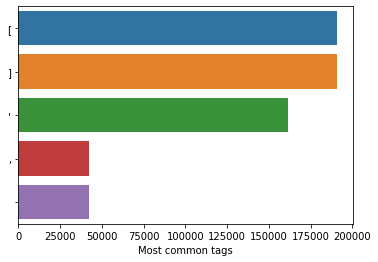

In [338]:
explore_data(df_twitter_joined, 'text', 'text_proc_v2')

average text length = 136.70809428256507
average word length = 5.206262366480284


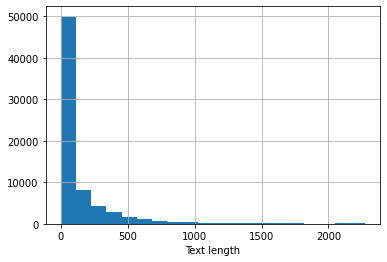

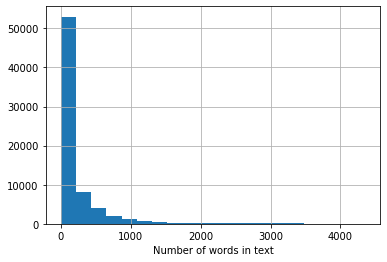

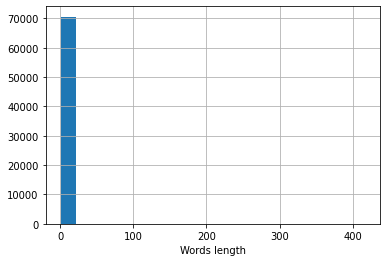

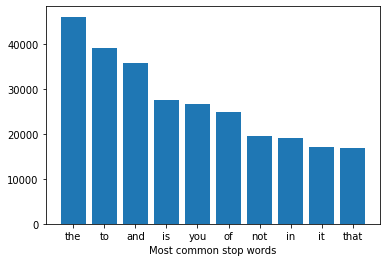

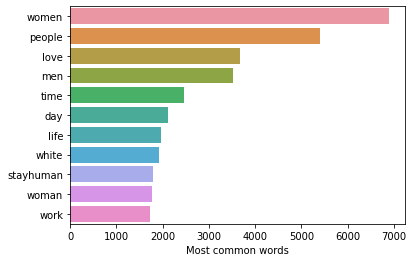

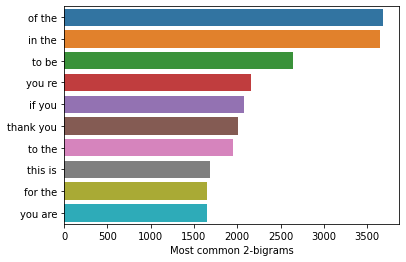

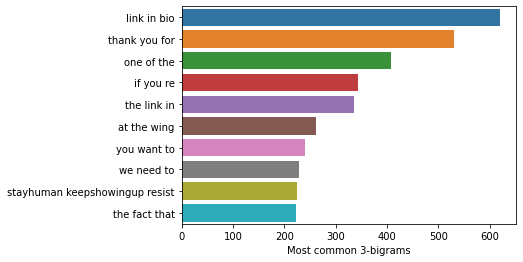

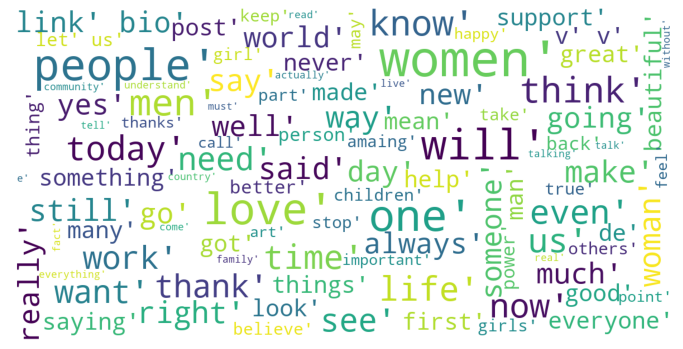

<ipython-input-266-1ea6693d0f8b>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instagram_with_tags['tags_ar'] = df_instagram_with_tags['tags'].apply(lambda t: re.sub("[\[\]\',]", '', t).\


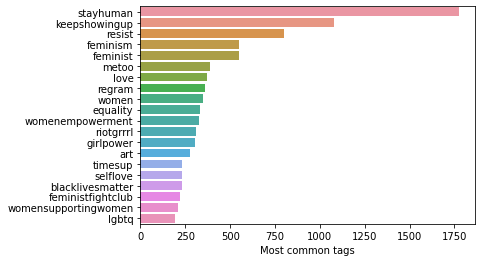

In [267]:
explore_data(df_instagram, 'text', 'text_proc_v2')

In [25]:
print(len(df_instagram[df_instagram['is_comment'] == True]))
print(len(df_instagram[df_instagram['is_comment'] == False]))

52938
17828


In [221]:
df_instagram_with_tags = df_instagram_with_tags[df_instagram_with_tags['tags'].isnull() == False]
df_instagram_with_tags['tags_ar'] = df_instagram_with_tags['tags'].apply(lambda t: re.sub("[\[\]\',]", '', t).\
                                                               split()).apply(np.array)

<AxesSubplot:>

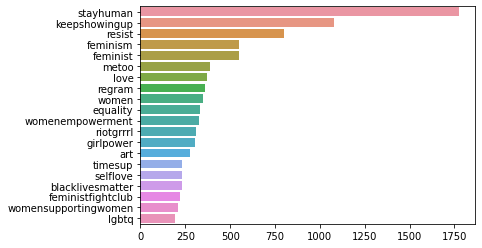

In [228]:
corpus = []
for tags in df_instagram_with_tags['tags_ar'].values:
    corpus.extend(tags)

counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word, count in most[:20]: 
    if (word not in stopWords and word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [5]:
twitter_output = [dI for dI in os.listdir('../scrapers/twitter-results') \
                  if not os.path.isdir(os.path.join('../scrapers/twitter-results',dI)) \
                 and dI.startswith('twitter') and dI.endswith('json')]


In [6]:
twitter_dta = []
for file in twitter_output:
    try:
        with open('../scrapers/twitter-results/' + file) as json_file:
            print(file)
            tw_data = json.load(json_file)
            for tw in tw_data:
                tags = list(map(lambda t: t['text'], tw['entities']['hashtags']))
                loc_country = None
                loc_country_name = None
                if tw['place'] is not None:
                    loc_country = tw['place']['country_code']
                    loc_country_name = tw['place']['name']
                possibly_sensitive = None
                if 'possibly_sensitive' in tw:
                    possibly_sensitive = tw['possibly_sensitive']
                twitter_dta.append([tw['id'], tw['text'], tw['retweet_count'], tw['created_at'], 
                                   tags, tw['is_quote_status'], tw['retweet_count'],
                                   tw['favorite_count'], possibly_sensitive, loc_country, loc_country_name])
    except Exception as e:
        print('error')
        print(e)
df_twitter = pd.DataFrame(data=twitter_dta,columns=['id', 'text', 'retweet', 'created_at', 'tags', 
                                                   'is_quote_status', 'retweet_count', 'favorite_count', 
                                                   'possibly_sensitive', 'loc_country', 'loc_country_name'])
df_twitter.head()

twitter_mybodymychoice_tag_v2.json
twitter_MenstrualEquity_tag_v2.json
twitter_endsexualassault_search.json
twitter_SheTransformsTech_search.json
twitter_blacklivesmatter_search.json
twitter_YoungFeminists_tag_v2.json
twitter_challengeaccepted_tag_v2.json
twitter_femaleempowerment_tag_v2.json
twitter_ToTheGirls_search.json
twitter_equality_tag_v2.json
twitter_SheTransforsmsTech_tag_v2.json
twitter_EffYourBeautyStandards_search.json
twitter_TimesUp_tag_v2.json
twitter_MeAt14_search.json
twitter_genderequality_search.json
twitter_BelieveWomen_tag_v2.json
twitter_bhfyp_tag_v2.json
twitter_woman_search.json
twitter_smashthepatriarchy_tag_v2.json
twitter_lgbt_search.json
twitter_womensupportingwomen_tag_v2.json
twitter_feminism_search_name.json
twitter_love_search.json
twitter_TimesUp_search.json
twitter_EffYourBeautyStandards_tag_v2.json
twitter_equality_search.json
twitter_ToTheGirls_tag_v2.json
twitter_femaleempowerment_search.json
twitter_challengeaccepted_search.json
twitter_YoungFemin

,id,text,retweet,created_at,tags,is_quote_status,retweet_count,favorite_count,possibly_sensitive,loc_country,loc_country_name
0,1389235225713168388,RT @st0ckm0nster: @globalnews Absolutely NOT\n...,7,Mon May 03 15:07:43 +0000 2021,[],False,7,0,None,None,None
1,1389234966064680962,Mark Words: @GovRonDeSantis is the next Presid...,0,Mon May 03 15:06:41 +0000 2021,[],False,0,1,False,None,None
2,1389232034581712898,"598 so far today (213,313 this year) - Accordi...",0,Mon May 03 14:55:02 +0000 2021,[],False,0,0,None,None,None
3,1389230664868761600,"@Mikel_Jollett If the vaccine works, you would...",0,Mon May 03 14:49:35 +0000 2021,[mybodymychoice],False,0,0,None,None,None
4,1389229375237857289,Bodily autonomy is the right to say no and the...,0,Mon May 03 14:44:28 +0000 2021,[],False,0,1,False,None,None


In [7]:
len(df_twitter)

109360

In [16]:
df_twitter.drop_duplicates(subset=['id'], inplace=True)
print(len(df_twitter))

88860


In [17]:
df_twitter.to_json('twitter_dataframe.json')

In [282]:
df_twitter = df_twitter.drop_duplicates(subset=['id'])

In [283]:
len(df_twitter)

88860

In [288]:
df_twitter['text_proc_v2'] = df_twitter['text'].astype(str).apply(text_preprocessing)

<ipython-input-288-2255a3b1dc2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter['text_proc_v2'] = df_twitter['text'].astype(str).apply(text_preprocessing)


In [46]:
df_twitter_2 = pd.read_csv('df_twitter.uu')
df_twitter_2.head()

,Unnamed: 0,id,text,retweet,created_at,tags,is_quote_status,retweet_count,favorite_count,possibly_sensitive,loc_country,loc_country_name,text_proc_tm,text_proc
0,0,1259945972555227138,RT @thestartupsquad: Really @Forbes? 8 boys pl...,24,Mon May 11 20:38:23 +0000 2020,[],False,24,0,NaN,NaN,NaN,boy sister plenty girl amaze,boy sister plenty girl amaze
1,1,1259945897166647296,RT @MPKchaitu: @jyotitiwari05 @ArvindKejriwal ...,2,Mon May 11 20:38:05 +0000 2020,[],False,2,0,NaN,NaN,NaN,busy think free bies,busy think free bies
2,2,1259945796671332352,RT @wkl_media: Birthday Shoot 🎁🎉🎂. . .\n.\nMod...,1,Mon May 11 20:37:41 +0000 2020,"['birthdayshoot', 'bedroom', 'shirt', 'indoor']",False,1,0,NaN,NaN,NaN,birthday shoot model photographer birthdayshoo...,birthday shoot party popper birthday cake mode...
3,3,1259945138245296129,RT @MPKchaitu: @jyotitiwari05 @ArvindKejriwal ...,2,Mon May 11 20:35:04 +0000 2020,[],False,2,0,NaN,NaN,NaN,busy think free bies,busy think free bies
4,4,1259944644969771012,@jyotitiwari05 @ArvindKejriwal @SwatiJaiHind @...,2,Mon May 11 20:33:06 +0000 2020,[],False,2,2,NaN,NaN,NaN,busy think free http up9jedi9jo,busy think free http up9jedi9jo


In [47]:
df_twitter_2['tags'] = df_twitter_2['tags'].apply(lambda t: re.sub("[\[\]\',]", '', t).split()).apply(np.array)

In [48]:
df_twitter_2['text_proc_v2'] = df_twitter_2['text'].astype(str).apply(text_preprocessing)

NameError: name 'text_preprocessing' is not defined

In [49]:
df_twitter_joined = df_twitter.append(df_twitter_2)

In [50]:
print(len(df_twitter_joined))
df_twitter_joined.drop_duplicates(subset=['id'], inplace=True)
print(len(df_twitter_joined))

279690
270580


In [52]:
df_twitter_joined.reset_index(drop=True, inplace=True)
df_twitter_joined.to_json('twitter_dataframe_joined.json')

In [292]:
df_twitter_joined.head()

,id,text,retweet,created_at,tags,is_quote_status,retweet_count,favorite_count,possibly_sensitive,loc_country,loc_country_name,text_proc,text_proc_v2,Unnamed: 0,text_proc_tm
0,1389235225713168388,RT @st0ckm0nster: @globalnews Absolutely NOT\n...,7,Mon May 03 15:07:43 +0000 2021,[],False,7,0,None,None,None,"[rt, absolutely, not, reason, govt, can, not, ...","[rt, absolutely, not, reason, govt, can, not, ...",NaN,NaN
1,1389234966064680962,Mark Words: @GovRonDeSantis is the next Presid...,0,Mon May 03 15:06:41 +0000 2021,[],False,0,1,False,None,None,"[mark, words, is, the, next, president, of, th...","[mark, words, is, the, next, president, of, th...",NaN,NaN
2,1389232034581712898,"598 so far today (213,313 this year) - Accordi...",0,Mon May 03 14:55:02 +0000 2021,[],False,0,0,None,None,None,"[so, far, today, this, year, according, to, ab...","[so, far, today, this, year, according, to, ab...",NaN,NaN
3,1389230664868761600,"@Mikel_Jollett If the vaccine works, you would...",0,Mon May 03 14:49:35 +0000 2021,[mybodymychoice],False,0,0,None,None,None,"[if, the, vaccine, works, you, would, not, car...","[if, the, vaccine, works, you, would, not, car...",NaN,NaN
4,1389229375237857289,Bodily autonomy is the right to say no and the...,0,Mon May 03 14:44:28 +0000 2021,[],False,0,1,False,None,None,"[bodily, autonomy, is, the, right, to, say, no...","[bodily, autonomy, is, the, right, to, say, no...",NaN,NaN


['mybodymychoice', 'MyBodyMyChoice', 'COVID', 'vaccine', 'MyBodyMyChoice', 'MyBodyMyChoice', 'MyBodyMyChoice', 'NoForcedVaccines', 'MyBodyMyChoice', 'NoForcedVaccines', 'MyBodyMyChoice', 'NoForcedVaccines', 'MyBodyMyChoice', 'ProLife', 'MyBodyMyChoice', 'Covid', 'thrombocytopenia', 'MyBodyMyChoice', 'MyBodyMyChoice', 'antivaxxers']


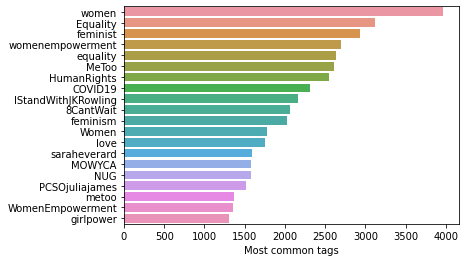

In [345]:
explore_data(df_twitter_joined, 'text', 'text_proc_v2')

In [35]:
reddit_output = [dI for dI in os.listdir('../scrapers/reddit-results') if not os.path.isdir(os.path.join('scraper',dI)) \
                 and not dI.startswith('../scrapers/reddit-results') and dI.endswith('json') and 'tag' not in dI]

reddit_info = []
for reddit_file in reddit_output:
    with open('../scrapers/reddit-results/' + str(reddit_file)) as json_file:
        reddit_data = json.load(json_file)
        for subreddit in reddit_data:
            txt = subreddit.get('title', '') + '. ' + \
                subreddit.get('selftext', '')
            txt_all = txt
            count = 0
            for c in subreddit.get('comments', []):
                if c['body'] is not None:
                    txt_all = txt_all + c['body']
                    count += 1
                    count_c = 0
                    for cc in c['comments']:
                        txt_all = txt_all + cc['body']
                        count += 1
                        count_c += 1
                        count_cc = 0
                        for ccc in cc['comments']:
                            reddit_info.append([
                                ccc['id'], #id
                                ccc['parent_id'], #parent_id
                                subreddit.get('id', ''), #topic_id
                                str(reddit_file), #subreddit_topic
                                ccc['body'], #text
                                ccc['score'], #score
                                ccc['created_utc'], #utc
                                True,#is_comment
                                0#com_count
                            ])
                            txt_all = txt_all + ccc['body']
                            count += 1
                            count_cc += 1
                        reddit_info.append([
                            cc['id'],
                            cc['parent_id'], 
                            subreddit.get('id', ''),
                            str(reddit_file),
                            cc['body'],
                            cc['score'], 
                            cc['created_utc'], 
                            True, 
                            count_cc
                        ])
                    reddit_info.append([
                        c['id'], 
                        c['parent_id'], 
                        subreddit.get('id', ''), 
                        str(reddit_file), 
                        c['body'], 
                        c['score'], 
                        c['created_utc'],
                        True,
                        count_c
                    ])
            reddit_info.append([
                subreddit.get('id', ''),
                None, 
                None,
                str(reddit_file), 
                txt, 
                subreddit.get('score', None), 
                subreddit.get('created_utc', None), 
                False, 
                count
            ])
            
df_reddit = pd.DataFrame(data=reddit_info, columns=['id', 'parent_id', 'topic_id', 'subreddit_topic', \
                                                    'text', 'score', 'utc', 'is_comment', 'com_count'])


In [36]:
print(len(df_reddit))
df_reddit.drop_duplicates(subset=['id'], inplace=True)
print(len(df_reddit))

432049
422707


In [37]:
df_reddit.to_json('reddit_dataframe.json')

In [38]:
df_reddit_2 = pd.read_csv('df_reddit.uu')
df_reddit_2.head()

/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,parent_id,topic_id,subreddit_topic,text,score,utc,is_comment,com_count,text_proc_tm,text_proc
0,0,ejnf52r,t3_b6og5d,b6og5d,TheGirlSurvivalGuide.json,Locking for so many reasons,1,1.553860e+09,False,0.0,lock reason,lock reason
1,1,ejm4hd0,t1_ejm1dfj,b6og5d,TheGirlSurvivalGuide.json,Tbh that’s a rlly good idea & ive never given ...,78,1.553813e+09,False,0.0,tbh rally good idea think deffo start,tbh rally good idea think deffo start
2,2,ejncosa,t1_ejm1dfj,b6og5d,TheGirlSurvivalGuide.json,You know they are uber and are coming for you....,1,1.553857e+09,False,0.0,uber come billion footpeople ya uber tell bran...,uber come billion footpeople ya uber tell bran...
3,3,ejm1dfj,t1_ejlzudf,b6og5d,TheGirlSurvivalGuide.json,i do this all the time! most of them already s...,310,1.553811e+09,False,2.0,time car approach check license plate car matc...,time car approach check license plate car matc...
4,4,ejmn1jh,t1_ejlzudf,b6og5d,TheGirlSurvivalGuide.json,Wait people don't do this? How else do you kno...,26,1.553826e+09,False,0.0,wait people uber london base remembers letter ...,wait people uber london base remembers letter ...


In [39]:
df_reddit_joined = df_reddit.append(df_reddit_2)
df_reddit_joined.head()

,id,parent_id,topic_id,subreddit_topic,text,score,utc,is_comment,com_count,Unnamed: 0,text_proc_tm,text_proc
0,gpjrpm4,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,I feel the exact same way. I live in a state w...,262,1.614789e+09,True,0.0,NaN,NaN,NaN
1,gpjiflz,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,I feel all of this so much! I started having s...,105,1.614785e+09,True,0.0,NaN,NaN,NaN
2,gpjrcqi,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,I know 18 people who have had it. 5 of them di...,266,1.614789e+09,True,0.0,NaN,NaN,NaN
3,gpjtfvf,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,Fuck yes it is. Especially in Texas where the ...,62,1.614790e+09,True,0.0,NaN,NaN,NaN
4,gpj4nc4,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,"I feel the same, I barely see people or go out...",387,1.614778e+09,True,0.0,NaN,NaN,NaN


In [40]:
print(len(df_reddit_joined))
df_reddit_joined.drop_duplicates(subset=['id'], inplace=True)
print(len(df_reddit_joined))

646380
629302


In [41]:
print(len(df_reddit[df_reddit['is_comment'] == True]))
print(len(df_reddit[df_reddit['is_comment'] == False]))

338387
84320


In [42]:
print(len(df_reddit_joined[df_reddit_joined['is_comment'] == True]))
print(len(df_reddit_joined[df_reddit_joined['is_comment'] == False]))

344967
284331


In [32]:
df_reddit_joined

,id,parent_id,topic_id,subreddit_topic,text,score,utc,is_comment,com_count,Unnamed: 0,text_proc_tm,text_proc
0,gpjrpm4,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,I feel the exact same way. I live in a state w...,262,1.614789e+09,True,0.0,NaN,NaN,NaN
1,gpjiflz,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,I feel all of this so much! I started having s...,105,1.614785e+09,True,0.0,NaN,NaN,NaN
2,gpjrcqi,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,I know 18 people who have had it. 5 of them di...,266,1.614789e+09,True,0.0,NaN,NaN,NaN
3,gpjtfvf,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,Fuck yes it is. Especially in Texas where the ...,62,1.614790e+09,True,0.0,NaN,NaN,NaN
4,gpj4nc4,t3_lwtogm,lwtogm,TheGirlSurvivalGuide.json,"I feel the same, I barely see people or go out...",387,1.614778e+09,True,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
223668,fnm8dzo,t3_g298zf,g298zf,WitchesVsPatriarchy.json,Can I be the High Priestess? She seems to know...,2,1.587067e+09,False,0.0,223666,high priestess,high priestess
223669,fnqzdhw,t3_g298zf,g298zf,WitchesVsPatriarchy.json,"I have a rare gem—my husband is a nurse, an ar...",2,1.587176e+09,False,0.0,223667,rare gem husband nurse ardent feminist beautif...,rare gem husband nurse ardent feminist beautif...
223670,fnk7zig,t3_g298zf,g298zf,WitchesVsPatriarchy.json,👍,3,1.587018e+09,False,0.0,223668,NaN,thumb
223671,fnkhxod,t3_g298zf,g298zf,WitchesVsPatriarchy.json,I'm a man. Can confirm this is exactly what ha...,2,1.587028e+09,False,0.0,223669,man confirm happen,man confirm happen


In [44]:
df_reddit_joined.reset_index(drop=True, inplace=True)
df_reddit_joined.to_json('reddit_dataframe_joined.json')

In [309]:
df_reddit_joined['text_proc_v2'] = df_reddit_joined['text'].astype(str).apply(text_preprocessing)

average text length = 217.67976215530362
average word length = 4.75619992621901


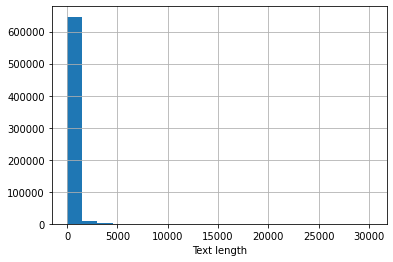

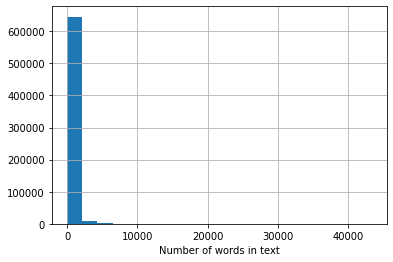

/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


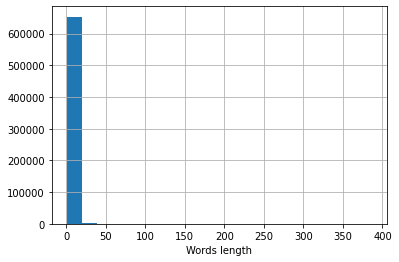

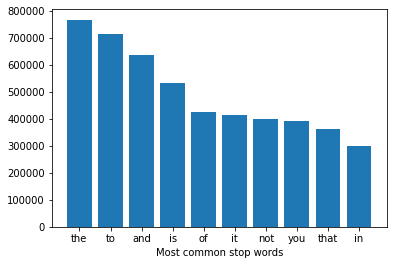

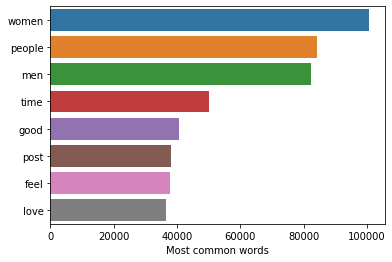

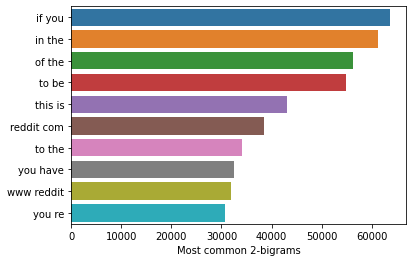

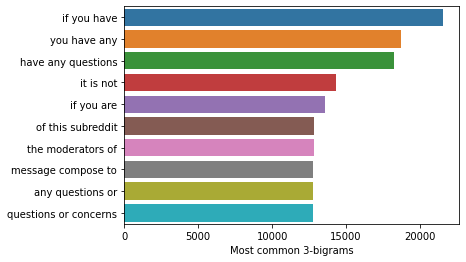

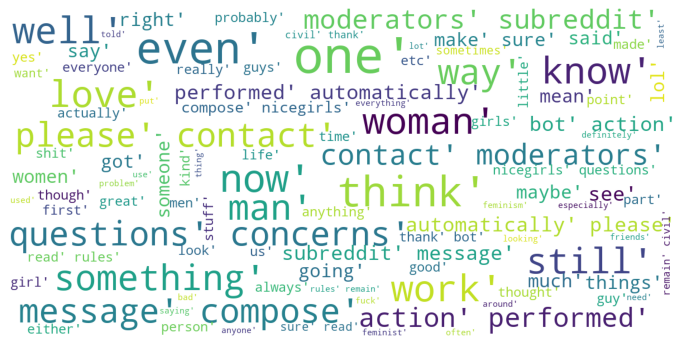

<ipython-input-310-718244f6bad0>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instagram_with_tags['tags_ar'] = df_instagram_with_tags['tags'].apply(lambda t: re.sub("[\[\]\',]", '', t).\


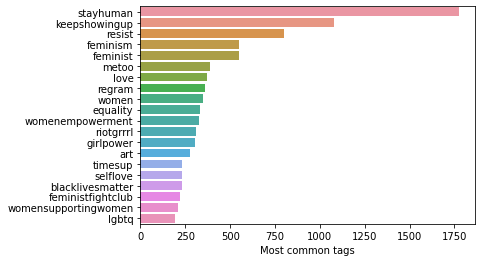

In [311]:
explore_data(df_reddit_joined, 'text', 'text_proc_v2')

In [20]:
tiktok_output = [dI for dI in os.listdir('../scrapers/tiktok-results') if not os.path.isdir(os.path.join('scraper',dI)) \
                 and not dI.startswith('../scrapers/tiktok-results') and dI.endswith('json') and 'tag' not in dI]

tiktok_info = []
for tiktok_file in tiktok_output:
    with open('../scrapers/tiktok-results/' + str(tiktok_file)) as json_file:
        tiktok_data = json.load(json_file)
        for t in tiktok_data:
#             print('-------')
#             print(t)
            tiktok_info.append([
                t['id'],
                t.get('desc', ''),
                t.get('createTime', ''),
                t.get('video', {"duration": None}).get('duration', None),
                t.get('author', {'id': None}).get('id', None),
                t['author']['uniqueId'],
                t['music']['title'],
                list(map(lambda t: t['title'], t.get('challenges', []))),
                t['stats']['diggCount'],
                t['stats']['shareCount'],
                t['stats']['commentCount'],
                t['stats']['playCount'],
                list(map(lambda t: t['hashtagName'], t.get('textExtra',[]))),
                list(map(lambda t: t.get('stickerText', []), t.get('stickersOnItem', [])))
            ])
print(tiktok_info[:10])

[['6921887153106603269', 'show: good girls #goodgirls #goodgirlsshow #feminist #feminism', 1611627459, 42, '6921885533481075718', 'moviesanimeandshows', 'original sound', ['goodgirls', 'goodgirlsshow', 'feminist', 'feminism'], 3600000, 23900, 63800, 22500000, ['goodgirls', 'goodgirlsshow', 'feminist', 'feminism'], [['man tries to r4pe her sister and she goes off. listen to what she says. ']]], ['6941081899544743174', 'yea. #fyp #feminism #facts #equality  #comedy #relationship #viral #womenempowerment #xyzbca', 1616096569, 28, '6722294647856563206', 'snotsm00thie', 'original sound', ['fyp', 'feminism', 'facts', 'equality', 'comedy', 'relationship', 'viral', 'womenempowerment', 'xyzbca'], 3000000, 102200, 41500, 11000000, ['fyp', 'feminism', 'facts', 'equality', 'comedy', 'relationship', 'viral', 'womenempowerment', 'xyzbca'], [['i find it disrespectful when boyfriends like other pictures of other half-naked girls', 'i also find it disrespectful when girlfriends fantasize about their ce

In [21]:
df_tiktok = pd.DataFrame(data=tiktok_info, columns=['id', 'desc', 'createTime', 'video_duration', \
                                                    'authorId', 'authorUniqueId', 'musicTitle', 'challenges', \
                                                    'diggCount', 'shareCount', 'commentCount', 'playCount', \
                                                   'textExtra', 'stickerText'])

In [22]:
df_tiktok.head()

,id,desc,createTime,video_duration,authorId,authorUniqueId,musicTitle,challenges,diggCount,shareCount,commentCount,playCount,textExtra,stickerText
0,6921887153106603269,show: good girls #goodgirls #goodgirlsshow #fe...,1611627459,42,6921885533481075718,moviesanimeandshows,original sound,"[goodgirls, goodgirlsshow, feminist, feminism]",3600000,23900,63800,22500000,"[goodgirls, goodgirlsshow, feminist, feminism]",[[man tries to r4pe her sister and she goes of...
1,6941081899544743174,yea. #fyp #feminism #facts #equality #comedy ...,1616096569,28,6722294647856563206,snotsm00thie,original sound,"[fyp, feminism, facts, equality, comedy, relat...",3000000,102200,41500,11000000,"[fyp, feminism, facts, equality, comedy, relat...",[[i find it disrespectful when boyfriends like...
2,6946699608449895685,Por mi y por TODAS 💜💚 #feministas #feminism#yo...,1617404545,52,6847936321492911110,boyslove_asian23,sonido original,"[feministas, feminism, yositecreo, kdrama, kor...",2800000,29800,0,10800000,"[feministas, feminism, yositecreo, kdrama, kor...",[]
3,6918821818841238786,Mrs. Feminism herself 😂😂😂. ...,1610913740,16,6738073606407029765,cher.tok,Men?,"[cher, music, fyp, fy, icon, woman, feminism]",2600000,63200,39400,9100000,"[cher, music, fyp, fy, icon, woman, feminism]",[]
4,6888789760144428294,#stitch with @2700relle #stats #feminism #fem...,1603921377,43,6624983741704798214,mrvdk,original sound,"[stitch, stats, feminism, feminist, feministik...",2400000,89800,44100,7400000,"[, stitch, stats, feminism, feminist, feminist...",[]


In [23]:
print(len(df_tiktok))
df_tiktok.drop_duplicates(subset=['id'], inplace=True)
print(len(df_tiktok))

348616
309640


In [58]:
df_tiktok.to_json('tiktok_dataframe.json')

In [55]:
def flatten(ar):
    return [item for sublist in ar for item in sublist]

In [56]:
df_tiktok['stickerText'] = df_tiktok['stickerText'].apply(flatten)

In [383]:
df_tiktok['stickerText'][30]

'I specifically studied gender-based trauma and I have two relevant master’s degrees from Harvard on this Let’s talk about men who say “nOt aLl mEn” This behavior comes from three sources First, this is a male pick me behavior “Oh I understand there are men out there who are acting in abusive and oppressive ways But I’m not one of them, I’m one of the good guys!” That is a total delusion by the way In a patriarchy, everyone has internalized misogyny and sexism And oppressive ways to treat women That’s why we all need to unlearn patriarchal ways of behaving Number two, the need to control women’s voices Notice how they are tone policing women far more than they are mad at those men who are abusing, harassing, and raping women  Who are giving rest of men a bad name Number three, male superiority complex This is related to the male pick me behavior “Oh I understand there are awful men out there who will abuse, rape, harass and oppress you But I’m not one of them. If you depend on me to pr

In [57]:
df_tiktok['stickerText'] = df_tiktok['stickerText'].apply(lambda t: ' '.join(t))

In [384]:
df_tiktok['desc_proc'] = df_tiktok['desc'].apply(text_preprocessing)
df_tiktok['stickerText_proc'] = df_tiktok['stickerText'].apply(text_preprocessing)

In [385]:
df_tiktok.head()

,id,desc,createTime,video_duration,authorId,authorUniqueId,musicTitle,challenges,diggCount,shareCount,commentCount,playCount,textExtra,stickerText,desc_proc,stickerText_proc
0,6921887153106603269,show: good girls #goodgirls #goodgirlsshow #fe...,1611627459,42,6921885533481075718,moviesanimeandshows,original sound,"[goodgirls, goodgirlsshow, feminist, feminism]",3600000,23900,63800,22500000,"[goodgirls, goodgirlsshow, feminist, feminism]",man tries to r4pe her sister and she goes off....,"[show, good, girls, goodgirls, goodgirlsshow, ...","[man, tries, to, r4pe, her, sister, and, she, ..."
1,6941081899544743174,yea. #fyp #feminism #facts #equality #comedy ...,1616096569,28,6722294647856563206,snotsm00thie,original sound,"[fyp, feminism, facts, equality, comedy, relat...",3000000,102200,41500,11000000,"[fyp, feminism, facts, equality, comedy, relat...",i find it disrespectful when boyfriends like o...,"[yea, fyp, feminism, facts, equality, comedy, ...","[i, find, it, disrespectful, when, boyfriends,..."
2,6946699608449895685,Por mi y por TODAS 💜💚 #feministas #feminism#yo...,1617404545,52,6847936321492911110,boyslove_asian23,sonido original,"[feministas, feminism, yositecreo, kdrama, kor...",2800000,29800,0,10800000,"[feministas, feminism, yositecreo, kdrama, kor...",,"[por, mi, y, por, todas, feministas, feminism,...",[]
3,6918821818841238786,Mrs. Feminism herself 😂😂😂. ...,1610913740,16,6738073606407029765,cher.tok,Men?,"[cher, music, fyp, fy, icon, woman, feminism]",2600000,63200,39400,9100000,"[cher, music, fyp, fy, icon, woman, feminism]",,"[mrs, feminism, herself, cher, music, fyp, fy,...",[]
4,6888789760144428294,#stitch with @2700relle #stats #feminism #fem...,1603921377,43,6624983741704798214,mrvdk,original sound,"[stitch, stats, feminism, feminist, feministik...",2400000,89800,44100,7400000,"[, stitch, stats, feminism, feminist, feminist...",,"[stitch, with, stats, feminism, feminist, femi...",[]


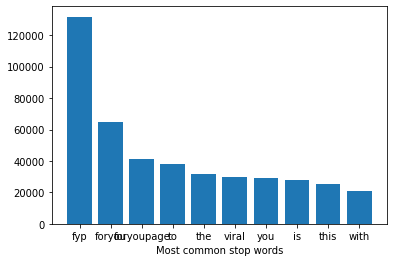

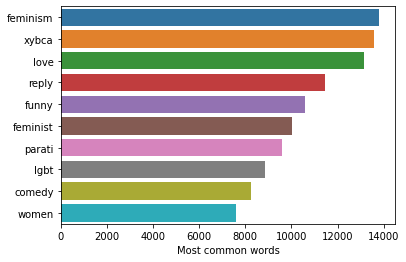

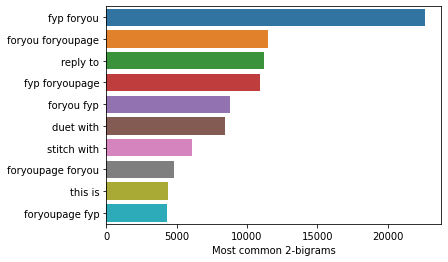

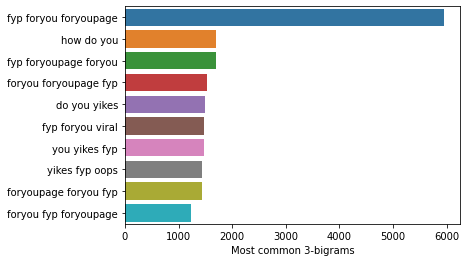

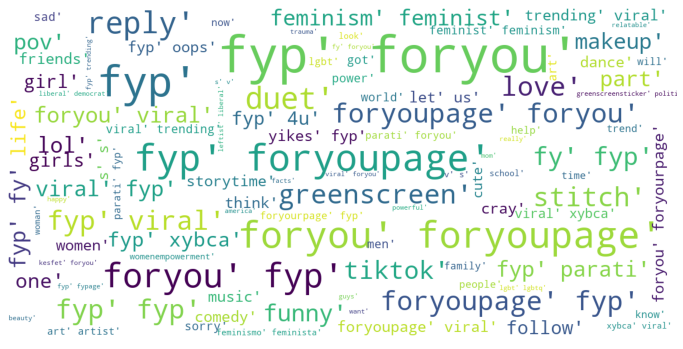

['goodgirls', 'goodgirlsshow', 'feminist', 'feminism', 'fyp', 'feminism', 'facts', 'equality', 'comedy', 'relationship', 'viral', 'womenempowerment', 'xyzbca', 'feministas', 'feminism', 'yositecreo', 'kdrama', 'korean', 'dorama', 'fyp']


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


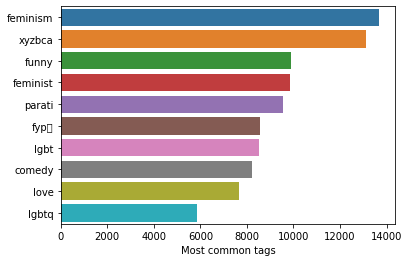

In [402]:
explore_data(df_tiktok, 'desc', 'desc_proc', 'challenges')

In [408]:
df_tiktok_video = df_tiktok[df_tiktok['stickerText'].str.len() > 0]

<ipython-input-422-c2fab765e485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].fillna('')
<ipython-input-422-c2fab765e485>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[proc_text_field] = df[proc_text_field].fillna('')


average text length = 159.14249799224834
average word length = 4.446383359577289


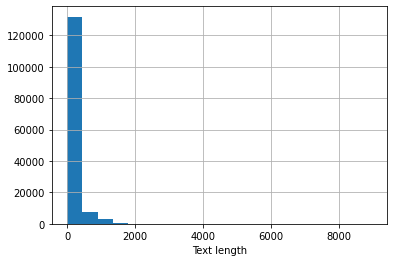

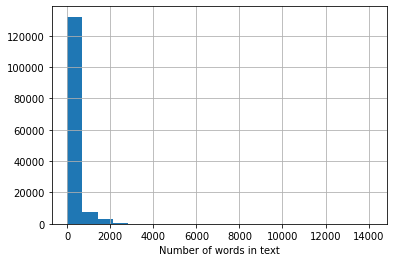

/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


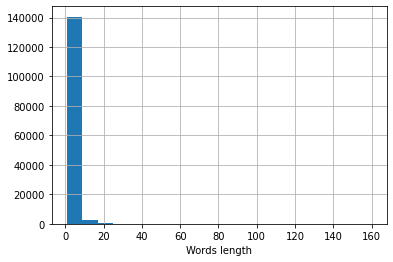

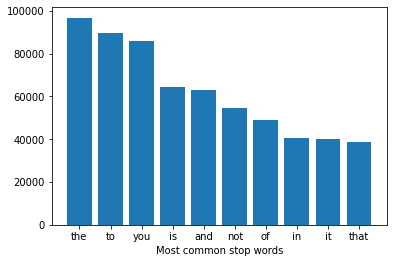

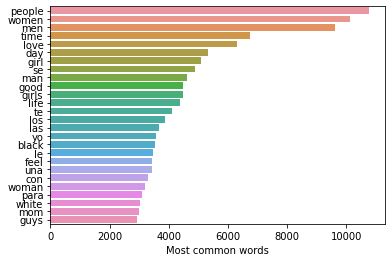

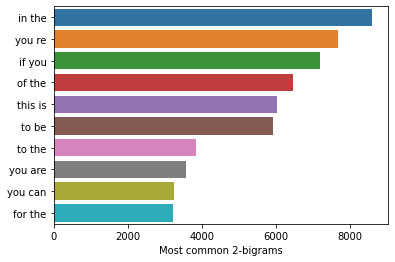

<ipython-input-422-c2fab765e485>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['txt'] = df[proc_text_field].apply(lambda t: ' '.join(t))


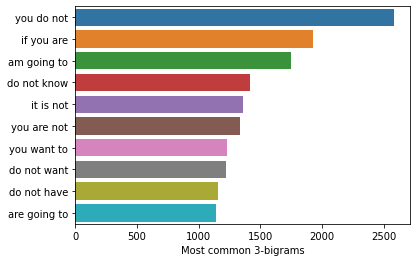

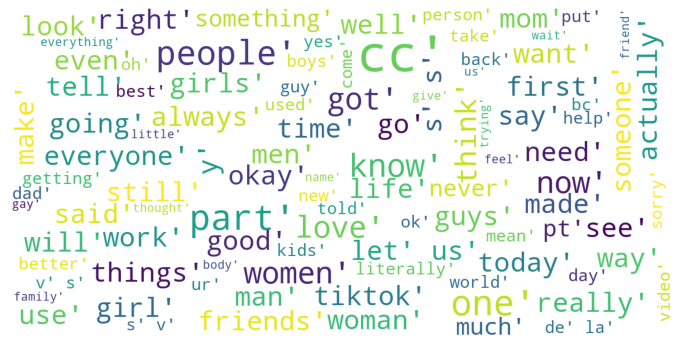

['goodgirls', 'goodgirlsshow', 'feminist', 'feminism', 'fyp', 'feminism', 'facts', 'equality', 'comedy', 'relationship', 'viral', 'womenempowerment', 'xyzbca', 'fyp', 'foryou', 'ukpolitics', 'politics', 'uspolitics', 'feminism', 'feminism']


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


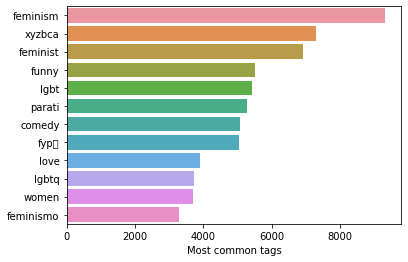

In [423]:
explore_data(df_tiktok_video, 'stickerText', 'stickerText_proc', 'challenges')

In [459]:
def process_tags(txt):
    words = nltk.word_tokenize(txt)
    tags = nltk.pos_tag(words)
    return list(map(lambda t: t[1], tags))

In [460]:
df_instagram['pos'] = df_instagram['text'].apply(process_tags)

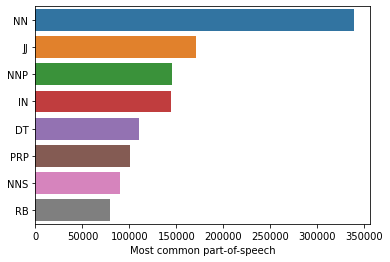

In [473]:
get_pos(df_instagram, 'pos')

In [477]:
def get_pos(df, field):
    corpus=[]
    stop_tags = ['#', '.', ':']
    new = df[field]
    corpus = [word for i in new for word in i]
    dic = defaultdict(int)
    for word in corpus:
        dic[word] += 1
    counter=Counter(corpus)
    x, y= [], []
    for word, count in counter.most_common()[:10]: 
        if word not in stop_tags:
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)
    plt.xlabel('Most common part-of-speech')
    plt.show()

In [474]:
df_twitter_joined['pos'] = df_twitter_joined['text'].apply(process_tags)

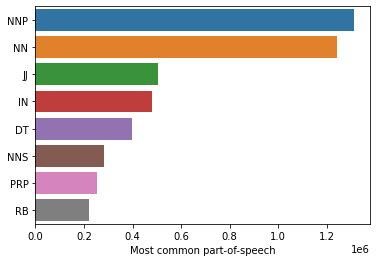

In [478]:
get_pos(df_twitter_joined, 'pos')

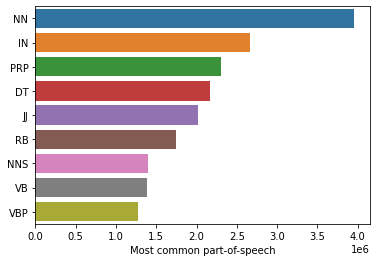

In [479]:
df_reddit_joined['pos'] = df_reddit_joined['text'].apply(process_tags)
get_pos(df_reddit_joined, 'pos')

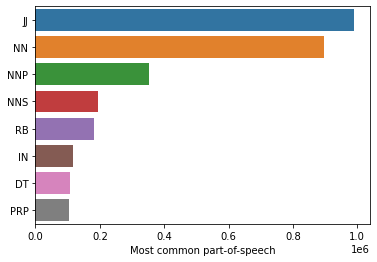

In [480]:
df_tiktok['pos'] = df_tiktok['desc'].apply(process_tags)
get_pos(df_tiktok, 'pos')

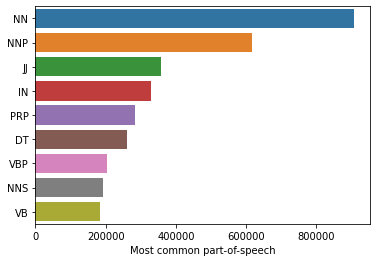

In [486]:
df_tiktok['stickerText_pos'] = df_tiktok['stickerText'].apply(process_tags)
get_pos(df_tiktok, 'stickerText_pos')

In [1]:
df_tiktok

NameError: name 'df_tiktok' is not defined